# Departamento de marketing

- Dados: https://www.kaggle.com/arjunbhasin2013/ccdata

## Problema de negócio

- This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

## Informações sobre as bases de dados


Following is the Data Dictionary for Credit Card dataset :-

- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user




## Importação das bibliotecas e das bases de dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
credito = pd.read_csv('credito.csv')

In [ ]:
print(f'O banco de dados têm:\n\n{credito.shape[0]} linhas\n{credito.shape[1]} colunas')


O banco de dados têm:

8950 linhas
18 colunas


In [ ]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from dataprep.eda import create_report

In [ ]:
relatorio = create_report(credito, title='Relatório')

Relatório
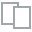
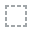
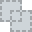
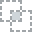
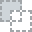
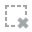
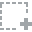
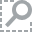
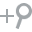
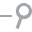
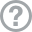
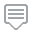
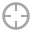
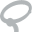
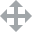
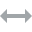
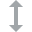
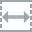
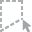
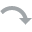
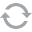
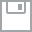
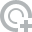
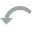
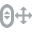
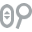
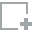
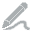
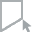
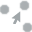
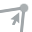
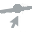

In [ ]:
relatorio

In [ ]:
relatorio.show_browser()

In [ ]:
credito.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
# Traduzindo o nome das colunas para português para facilitar o entendimento dos dados

credito.columns = ['ID_cliente','Saldo','Freq_atualiza_saldo','Valor_compras_total', 'Valor_compras_vista', 'Valor_compras_prazo',
                          'Saque_limite', 'Freq_compras', 'Freq_compras_vista', 'Freq_compras_prazo', 'Freq_saque', 'Qtd_saques', 'Qtd_compras',
                          'Limite_cartao', 'Divida_total_cartao', 'Parcela_minima_cartao', 'Parcela_total_cartao', 'Cliente_anos']

In [ ]:
credito.drop('ID_cliente', axis=1, inplace=True)

In [ ]:
credito.head(3)

,Saldo,Freq_atualiza_saldo,Valor_compras_total,Valor_compras_vista,Valor_compras_prazo,Saque_limite,Freq_compras,Freq_compras_vista,Freq_compras_prazo,Freq_saque,Qtd_saques,Qtd_compras,Limite_cartao,Divida_total_cartao,Parcela_minima_cartao,Parcela_total_cartao,Cliente_anos
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [ ]:
credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Saldo                  8950 non-null   float64
 1   Freq_atualiza_saldo    8950 non-null   float64
 2   Valor_compras_total    8950 non-null   float64
 3   Valor_compras_vista    8950 non-null   float64
 4   Valor_compras_prazo    8950 non-null   float64
 5   Saque_limite           8950 non-null   float64
 6   Freq_compras           8950 non-null   float64
 7   Freq_compras_vista     8950 non-null   float64
 8   Freq_compras_prazo     8950 non-null   float64
 9   Freq_saque             8950 non-null   float64
 10  Qtd_saques             8950 non-null   int64  
 11  Qtd_compras            8950 non-null   int64  
 12  Limite_cartao          8949 non-null   float64
 13  Divida_total_cartao    8950 non-null   float64
 14  Parcela_minima_cartao  8637 non-null   float64
 15  Parc

In [ ]:
# A coluna 'Limite_cartao' tem um valor nulo. Podemos remover essa única linha do dataset sem ter prejuízo de informações

credito.dropna(subset=['Limite_cartao'], inplace=True)

In [ ]:
# A coluna 'Parcela_minima_cartao' também parece ter valores nulos
credito.isnull().sum()

Saldo                      0
Freq_atualiza_saldo        0
Valor_compras_total        0
Valor_compras_vista        0
Valor_compras_prazo        0
Saque_limite               0
Freq_compras               0
Freq_compras_vista         0
Freq_compras_prazo         0
Freq_saque                 0
Qtd_saques                 0
Qtd_compras                0
Limite_cartao              0
Divida_total_cartao        0
Parcela_minima_cartao    313
Parcela_total_cartao       0
Cliente_anos               0
dtype: int64

In [ ]:
# Análise estatística da coluna 'Parcela_minima_cartao' para decidir com que valor preencher os valores vazios. 
# Ou se o melhor seria apenas deletar as linhas, mas todas as demais informações desses 313 clientes seriam perdidas 

In [ ]:
credito['Parcela_minima_cartao'].describe()[1:]

mean      864.304943
std      2372.566350
min         0.019163
25%       169.163545
50%       312.452292
75%       825.496463
max     76406.207520
Name: Parcela_minima_cartao, dtype: float64

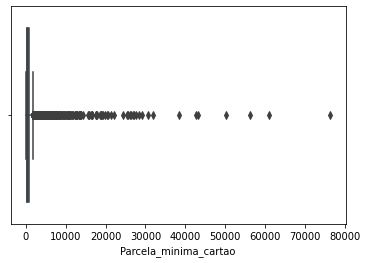

In [ ]:
# O valor máximo de pagamento da parcela mínima do cartão é 76406, quase 100x maior do que o valor do 3º quartil
# Um gráfico boxplot pode dar um insight sobre a distribuição e quantidade de outliers
sns.boxplot(x = credito['Parcela_minima_cartao']);

In [ ]:
# A média (864) é próxima do 3ª quartil. Nesse caso será melhor substituir os valores nulos pela mediana (312)

credito['Parcela_minima_cartao'] = credito['Parcela_minima_cartao'].fillna(credito['Parcela_minima_cartao'].median())

In [ ]:
# Todos os valores ausentes foram preenchidos com a mediana da coluna
credito['Parcela_minima_cartao'].isnull().sum()

0

In [ ]:
valor_max_vista = credito['Valor_compras_vista'].max()

In [ ]:
cliente_valor_max_vista = credito[credito['Valor_compras_vista'] == valor_max_vista]

In [ ]:
# Informações sobre o cliente que pagou o maior valor de compras à vista - interessante

cliente_valor_max_vista

,Saldo,Freq_atualiza_saldo,Valor_compras_total,Valor_compras_vista,Valor_compras_prazo,Saque_limite,Freq_compras,Freq_compras_vista,Freq_compras_prazo,Freq_saque,Qtd_saques,Qtd_compras,Limite_cartao,Divida_total_cartao,Parcela_minima_cartao,Parcela_total_cartao,Cliente_anos
550,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


# Defenição do número de clusteres usando o Elbow Method

##K-Means: Inertia - mede o quão bem o kmeans dividiu (clusterizou) o dataset

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

**A good model **is one with *low inertia* AND a *low number of clusters (K)*. However, this is a tradeoff because as K increases, inertia decreases.

T*o find the optimal K for a dataset, use the Elbow method;* find the point where the decrease in inertia begins to slow. K=3 is the “elbow” of this graph.



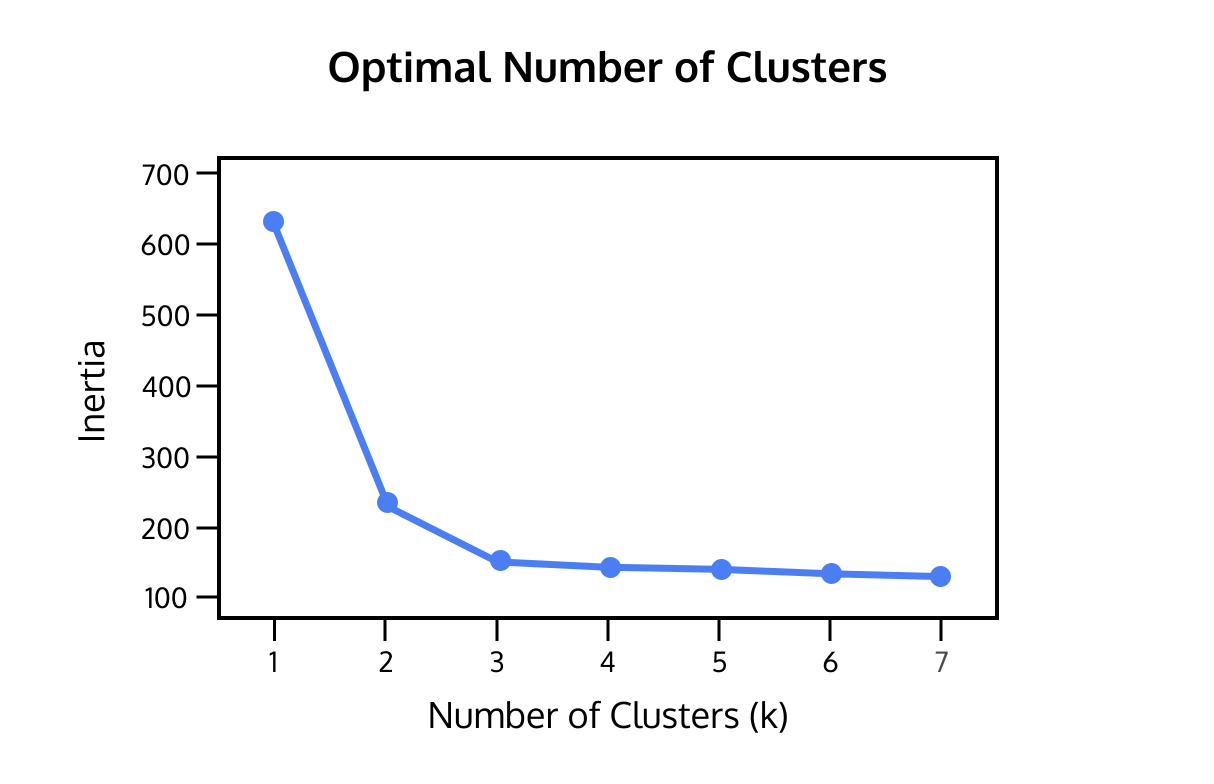

In [ ]:
min(credito['Saldo']), max(credito['Saldo'])

(0.0, 19043.13856)

In [ ]:
scaler = StandardScaler()
credito_padronizado = scaler.fit_transform(credito)

In [ ]:
credito_padronizado

array([[-0.73205404, -0.24988139, -0.4249337 , ..., -0.30242676,
        -0.52558844,  0.36054128],
       [ 0.78685815,  0.1340494 , -0.4695839 , ...,  0.0974534 ,
         0.2341587 ,  0.36054128],
       [ 0.44704093,  0.51798018, -0.10771601, ..., -0.09333029,
        -0.52558844,  0.36054128],
       ...,
       [-0.74046257, -0.18589504, -0.40200016, ..., -0.32690037,
         0.32912795, -4.12691899],
       [-0.74523857, -0.18589504, -0.4695839 , ..., -0.33832999,
         0.32912795, -4.12691899],
       [-0.57264377, -0.88976603,  0.0420915 , ..., -0.3243838 ,
        -0.52558844, -4.12691899]])

In [ ]:
credito = pd.DataFrame(credito_padronizado, columns=credito.columns)

In [ ]:
credito.isnull().sum()

Saldo                    0
Freq_atualiza_saldo      0
Valor_compras_total      0
Valor_compras_vista      0
Valor_compras_prazo      0
Saque_limite             0
Freq_compras             0
Freq_compras_vista       0
Freq_compras_prazo       0
Freq_saque               0
Qtd_saques               0
Qtd_compras              0
Limite_cartao            0
Divida_total_cartao      0
Parcela_minima_cartao    0
Parcela_total_cartao     0
Cliente_anos             0
dtype: int64

In [ ]:
wcss_1 = []
range_values = range(1,20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(credito)
  wcss_1.append(kmeans.inertia_)


In [ ]:
for i,j in enumerate(wcss_1):
  print(f'k = {i+1}\ninertia = {j}')

k = 1
inertia = 152132.9999999998
k = 2
inertia = 127772.60497938935
k = 3
inertia = 111962.41701180328
k = 4
inertia = 99054.0562729727
k = 5
inertia = 91484.01872082936
k = 6
inertia = 84818.39566129926
k = 7
inertia = 79740.11152384969
k = 8
inertia = 74588.30966916891
k = 9
inertia = 69849.44701758315
k = 10
inertia = 66473.86553688941
k = 11
inertia = 63606.5361118113
k = 12
inertia = 61326.79657830586
k = 13
inertia = 59142.71429423868
k = 14
inertia = 57468.79873617823
k = 15
inertia = 55867.785054993605
k = 16
inertia = 54266.83751129362
k = 17
inertia = 52974.00365874983
k = 18
inertia = 51632.73081292948
k = 19
inertia = 50725.93460018422
